<a href="https://colab.research.google.com/github/RennanRnz/RennanRnz/blob/main/MOD6TAR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sinasc_RO_2019.csv', na_values='na')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [ ]:
def categorizar_apgar5(apgar_score):
    if 0 <= apgar_score <= 3:
        return 'asfixia grave'
    elif 4 <= apgar_score <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar_score <= 7:
        return 'asfixia leve'

    else:
        return 'normal'

df['categoria_apgar'] = df['APGAR5'].apply(categorizar_apgar5)

print(df.head())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  CONTADOR  \
0      8 a 11 anos         NaN         0.0         0.0  ...         1   
1      8 a 11 anos    999992.0         1.0         0.0  ...         2   
2      8 a 11 anos    513205.0         2.0         0.0  ...         3   
3  12 anos ou mais    231205.0         0.0         0.0  ...         4   
4      8 a 11 anos    999992.0         1.0         0.0  ...         5   

  munResStatus munResTipo               munResNome  munResUf munResLat  \
0        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia -11.93554   
1        ATIVO  

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

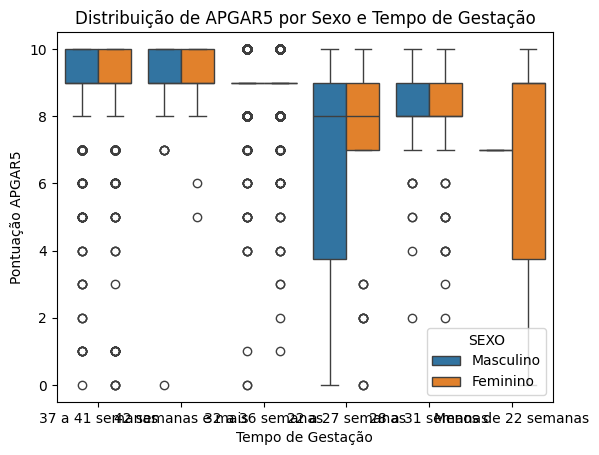

In [ ]:
sns.boxplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df)
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Pontuação APGAR5')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

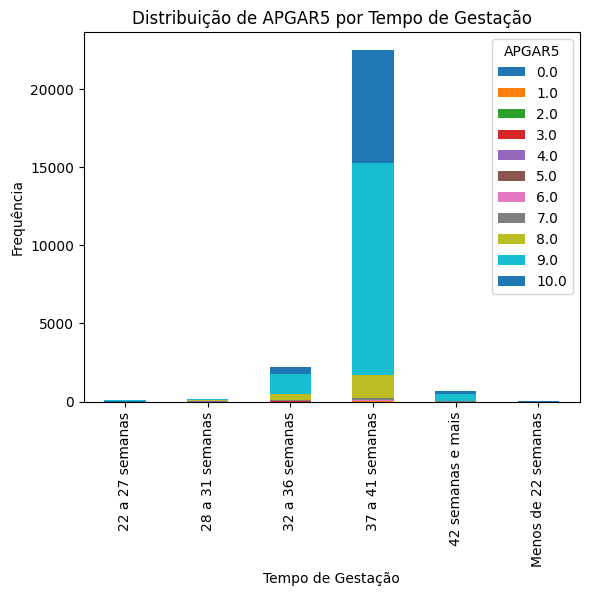

In [ ]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])

# Plotando o gráfico de barras empilhadas
tabela_cruzada.plot(kind='bar', stacked=True)
plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Frequência')
plt.show()

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [ ]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])

# Calculando os percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)

In [ ]:
print(percentuais_linha)

APGAR5                   0.0       1.0       2.0       3.0       4.0   \
GESTACAO                                                                
22 a 27 semanas      0.082353  0.000000  0.094118  0.070588  0.011765   
28 a 31 semanas      0.000000  0.000000  0.012346  0.006173  0.030864   
32 a 36 semanas      0.000895  0.000895  0.000895  0.000895  0.003581   
37 a 41 semanas      0.000222  0.000888  0.000133  0.000222  0.000311   
42 semanas e mais    0.001433  0.000000  0.000000  0.000000  0.000000   
Menos de 22 semanas  0.142857  0.000000  0.142857  0.000000  0.000000   

APGAR5                   5.0       6.0       7.0       8.0       9.0   \
GESTACAO                                                                
22 a 27 semanas      0.000000  0.023529  0.117647  0.282353  0.223529   
28 a 31 semanas      0.043210  0.043210  0.067901  0.376543  0.339506   
32 a 36 semanas      0.004924  0.007610  0.025067  0.162041  0.585049   
37 a 41 semanas      0.000932  0.001998  0.006704 

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

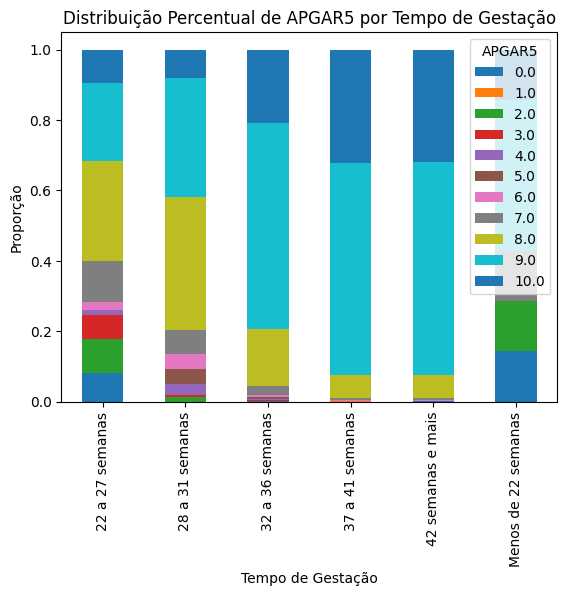

In [ ]:
percentuais_linha.plot(kind='bar', stacked=True)
plt.title('Distribuição Percentual de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Proporção')
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [ ]:
# Criando categorias de peso (ajuste os intervalos conforme necessário)
df['categoria_peso'] = pd.cut(df['PESO'], bins=[0, 2500, 4000, float('inf')], labels=['Baixo Peso', 'Normal', 'Alto Peso'])

# Criando a tabela cruzada
tabela_cruzada = pd.crosstab(df['categoria_peso'], df['APGAR5'])

<Axes: xlabel='APGAR5', ylabel='categoria_peso'>

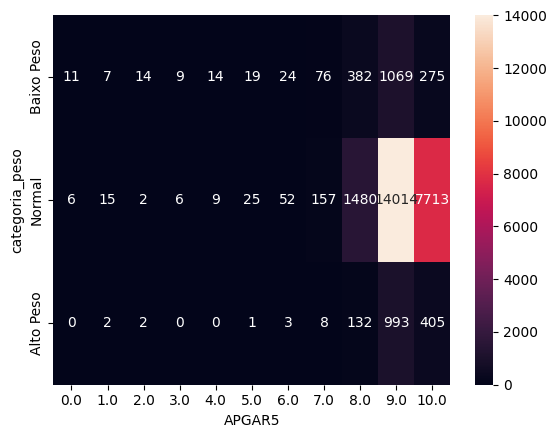

In [ ]:
sns.heatmap(tabela_cruzada, annot=True, fmt="d")

----------------------------------------------------------------